<H1>EDA<H1>
    Here we try to get some insights on the data we are working on.

In [1]:
import pandas as pd

df = pd.read_csv('Telco-Customer-Churn.csv')

In [2]:
df.count()

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<H1>Unique values in each column.

In [4]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")


Unique values in 'customerID': ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique values in 'gender': ['Female' 'Male']
Unique values in 'SeniorCitizen': [0 1]
Unique values in 'Partner': ['Yes' 'No']
Unique values in 'Dependents': ['No' 'Yes']
Unique values in 'tenure': [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Unique values in 'PhoneService': ['No' 'Yes']
Unique values in 'MultipleLines': ['No phone service' 'No' 'Yes']
Unique values in 'InternetService': ['DSL' 'Fiber optic' 'No']
Unique values in 'OnlineSecurity': ['No' 'Yes' 'No internet service']
Unique values in 'OnlineBackup': ['Yes' 'No' 'No internet service']
Unique values in 'DeviceProtection': ['No' 'Yes' 'No internet service']
Unique values in 'TechSupport': ['No' 'Yes' 'No internet service']
Unique valu

In [5]:
for column in df.columns:
    value_counts = df[column].value_counts()
    print(f"Counts of unique values in '{column}':\n{value_counts}\n")


Counts of unique values in 'customerID':
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

Counts of unique values in 'gender':
gender
Male      3555
Female    3488
Name: count, dtype: int64

Counts of unique values in 'SeniorCitizen':
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

Counts of unique values in 'Partner':
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Counts of unique values in 'Dependents':
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Counts of unique values in 'tenure':
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

Counts of unique values in 'PhoneService':
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Counts of unique values i

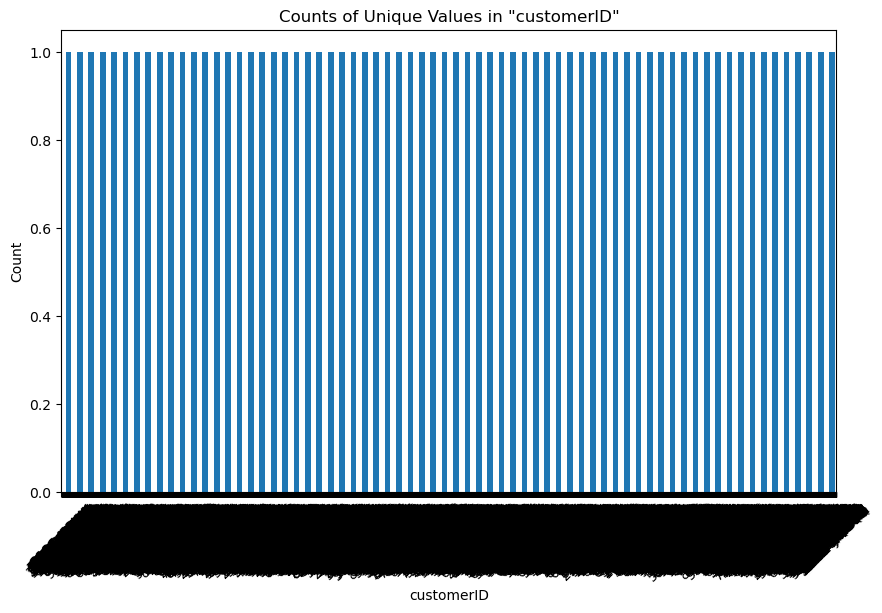

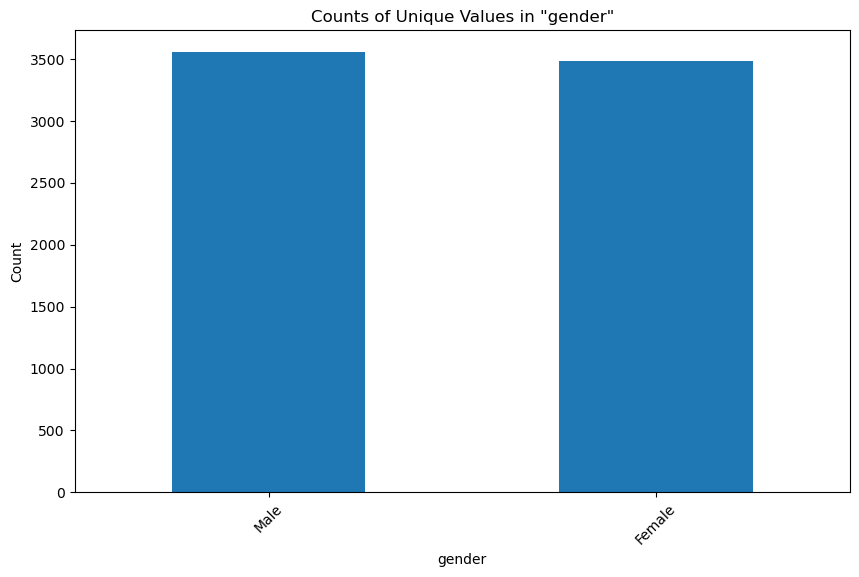

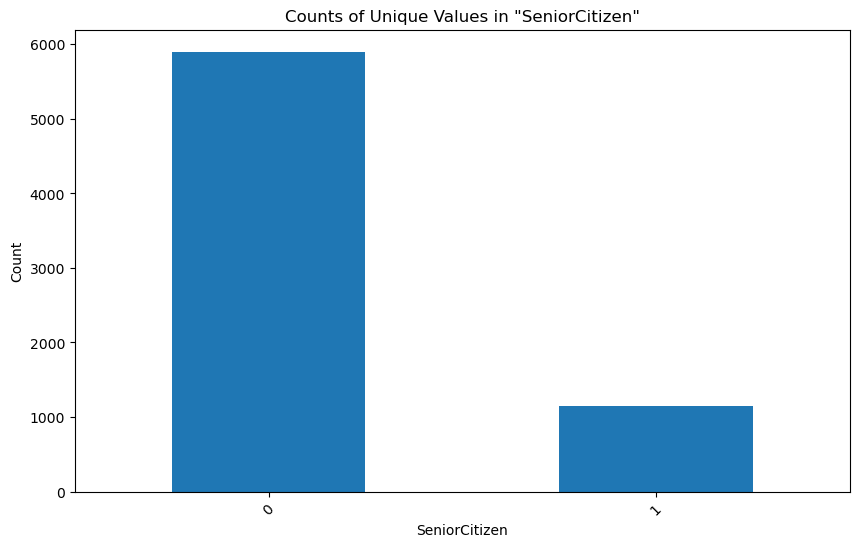

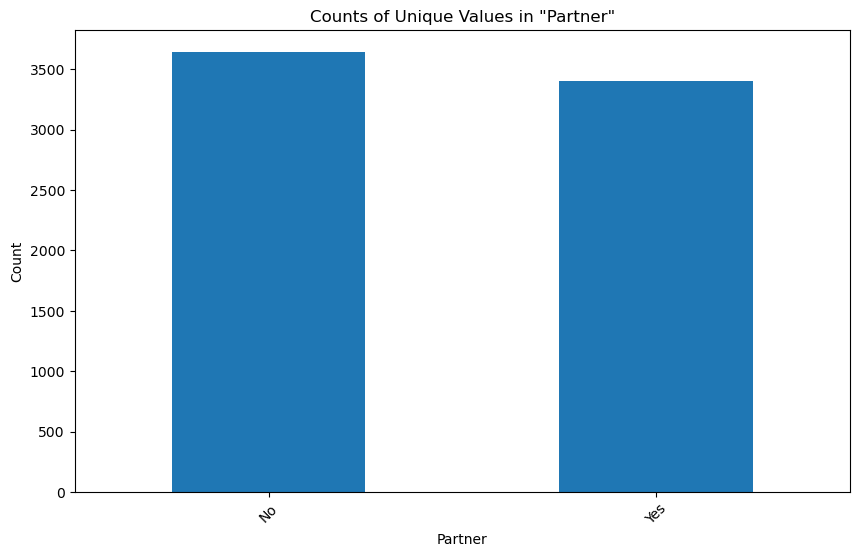

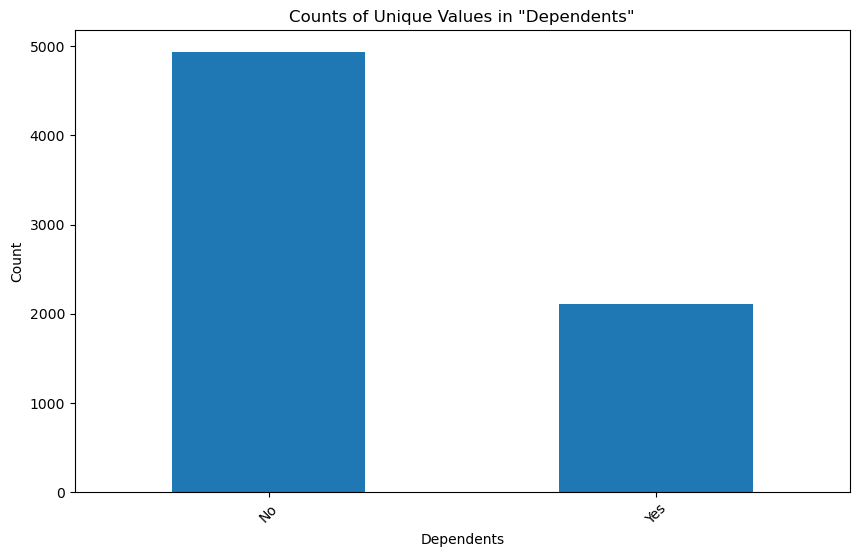

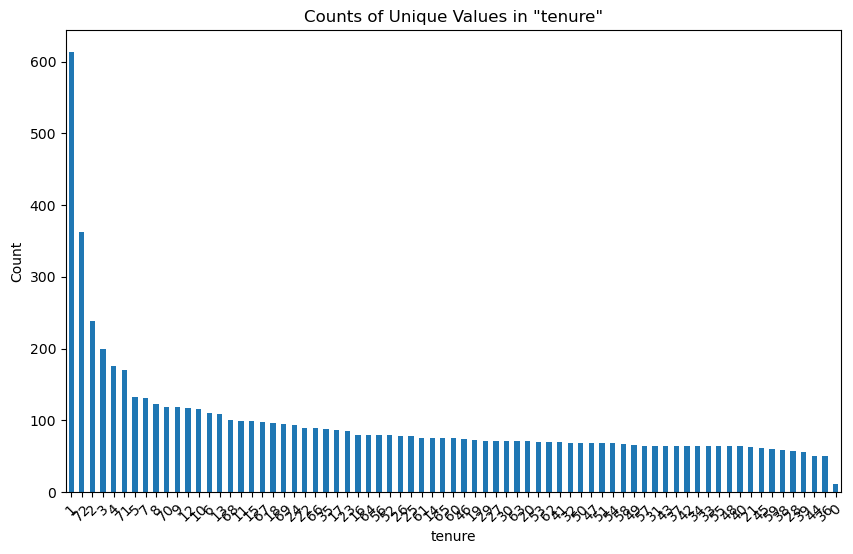

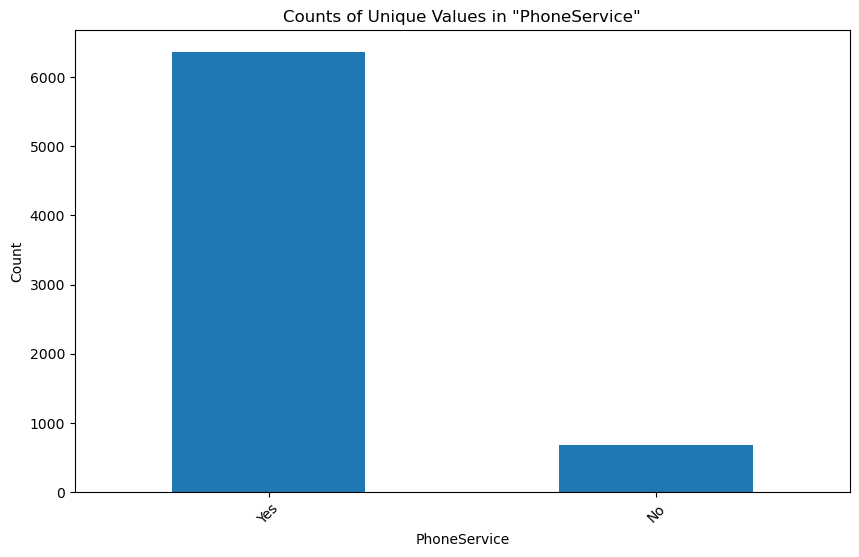

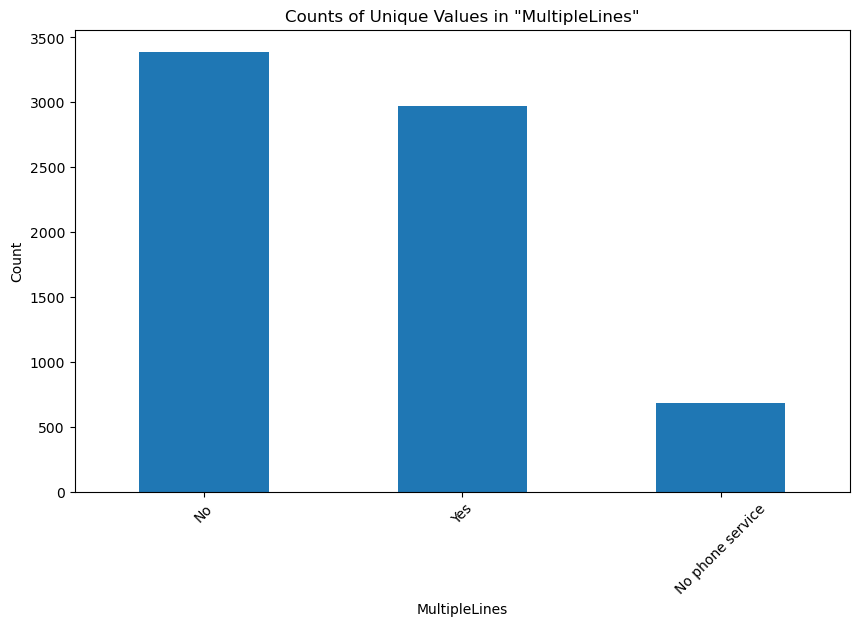

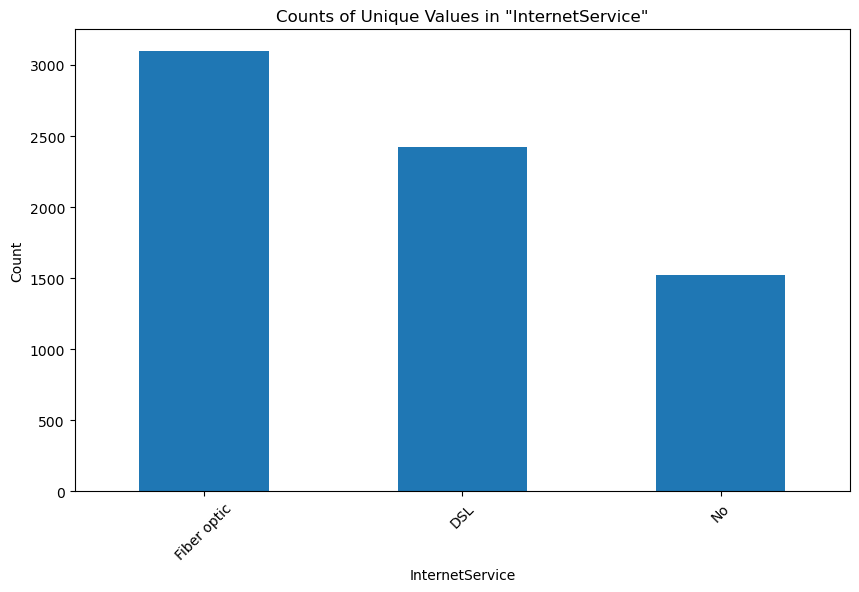

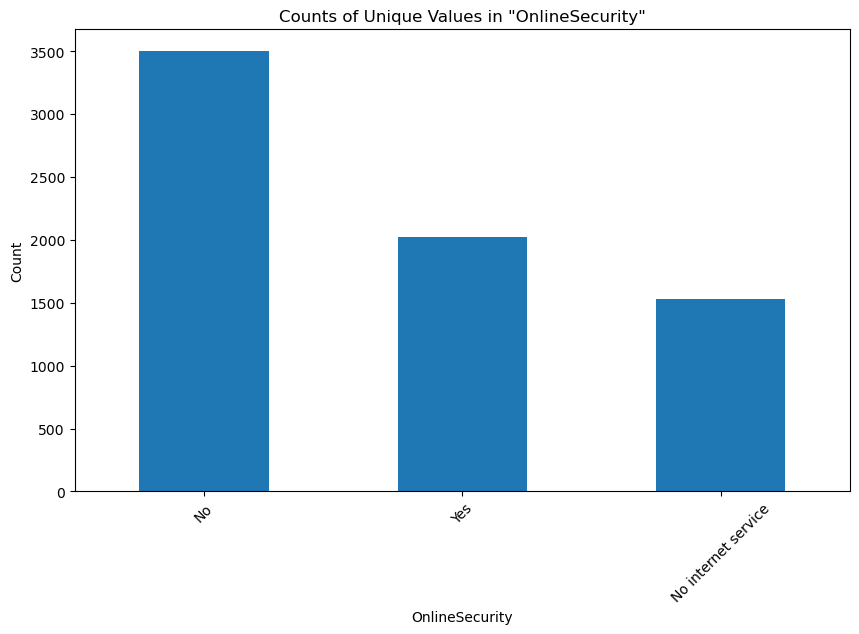

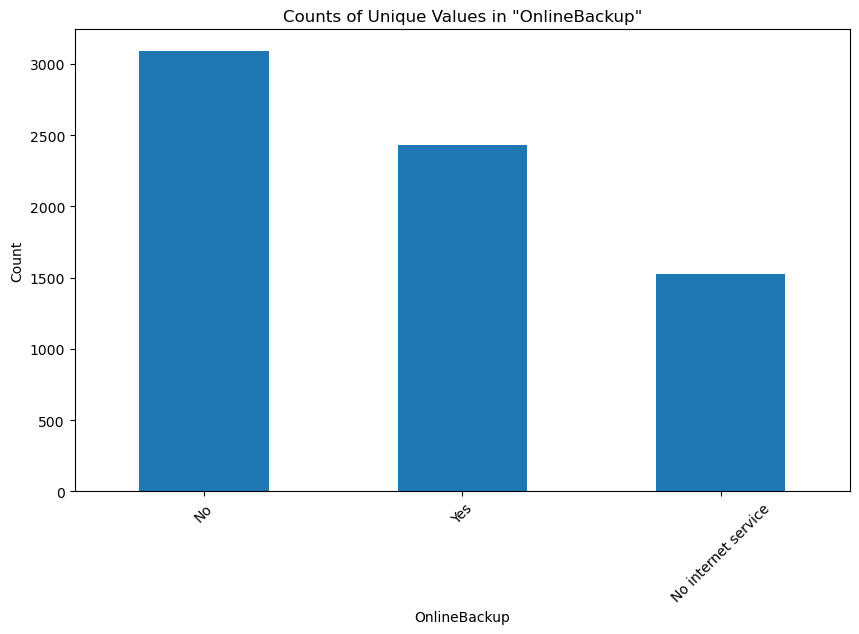

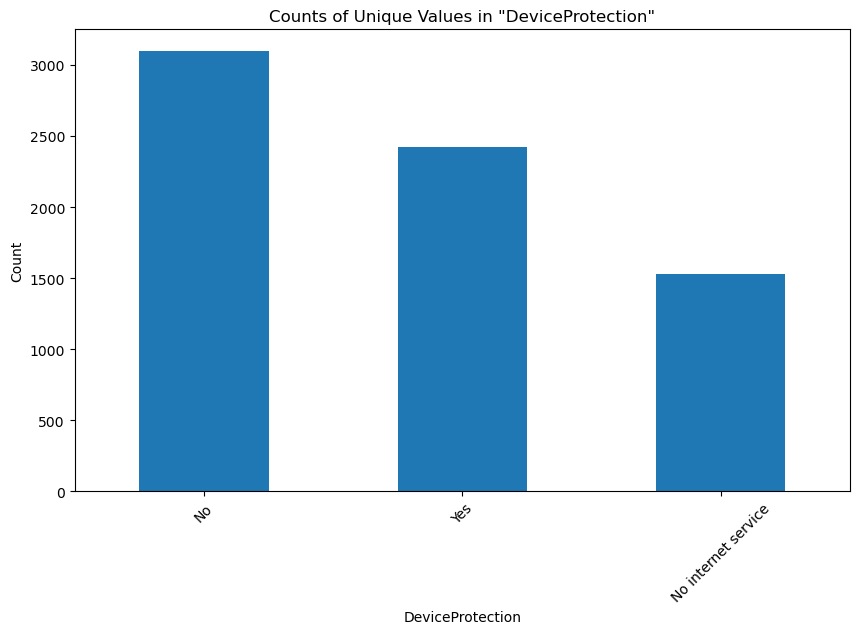

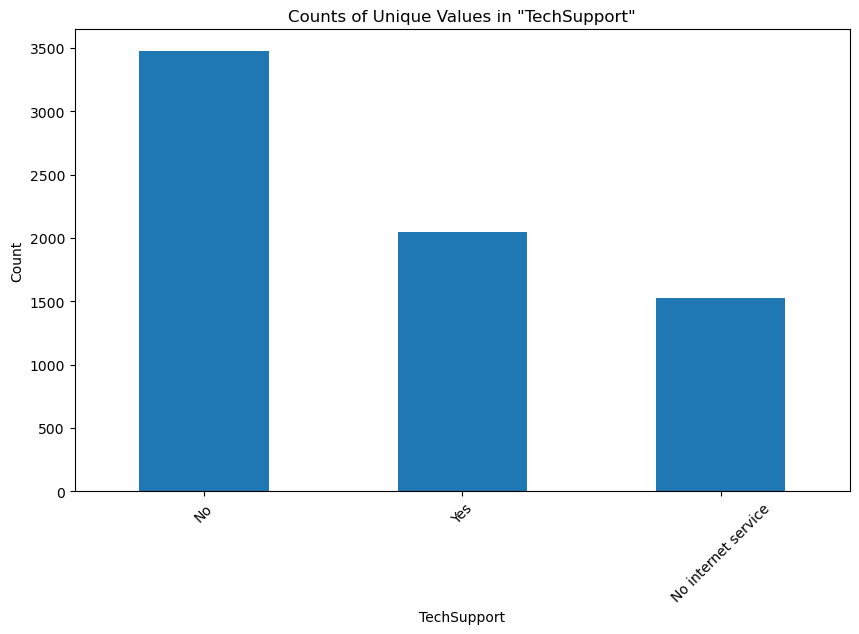

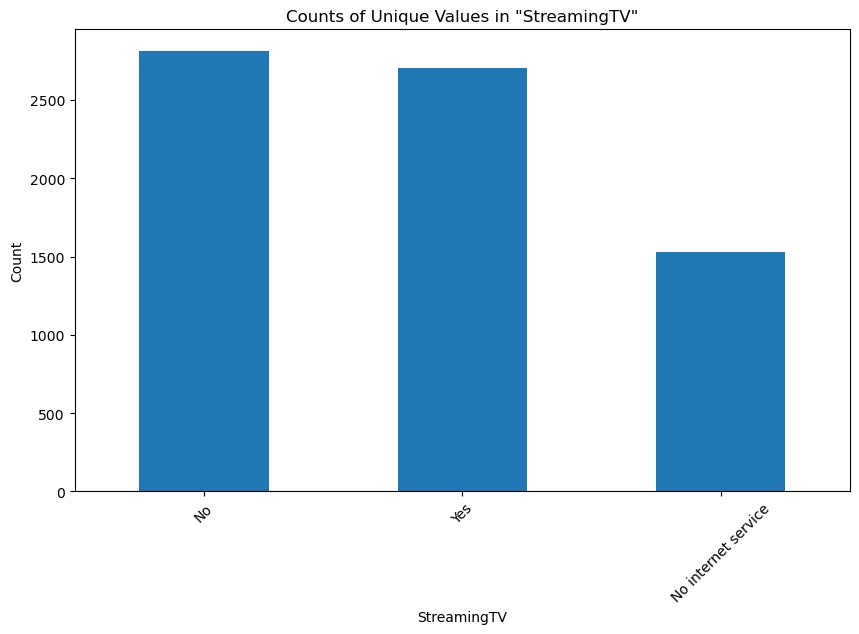

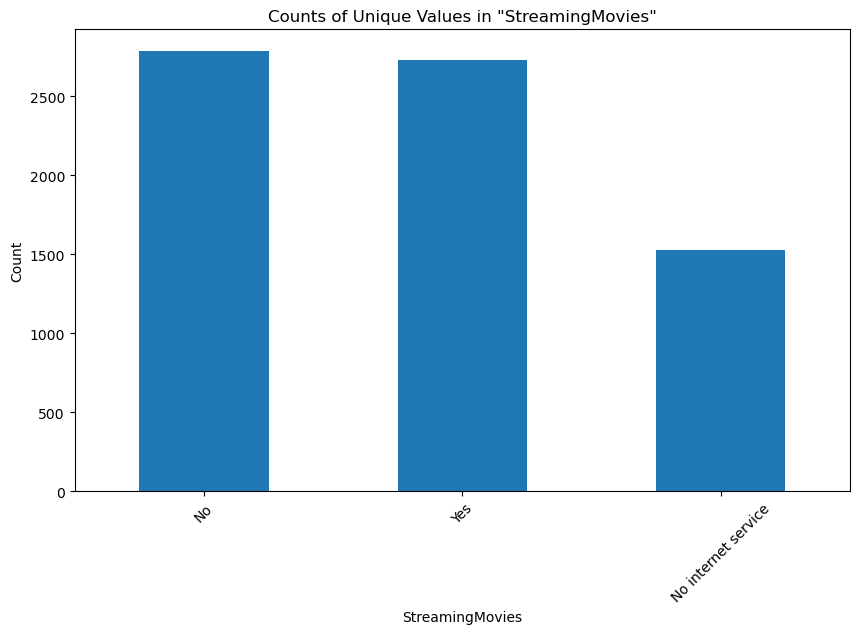

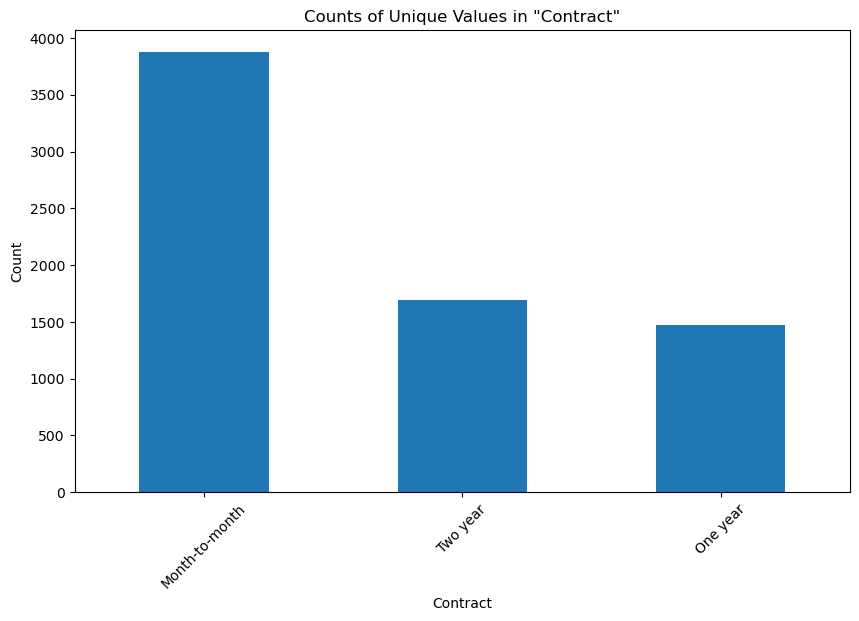

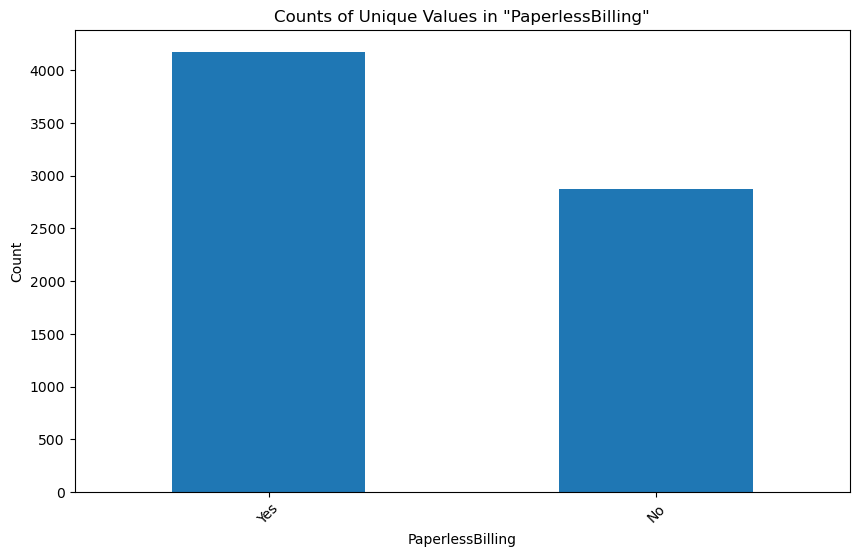

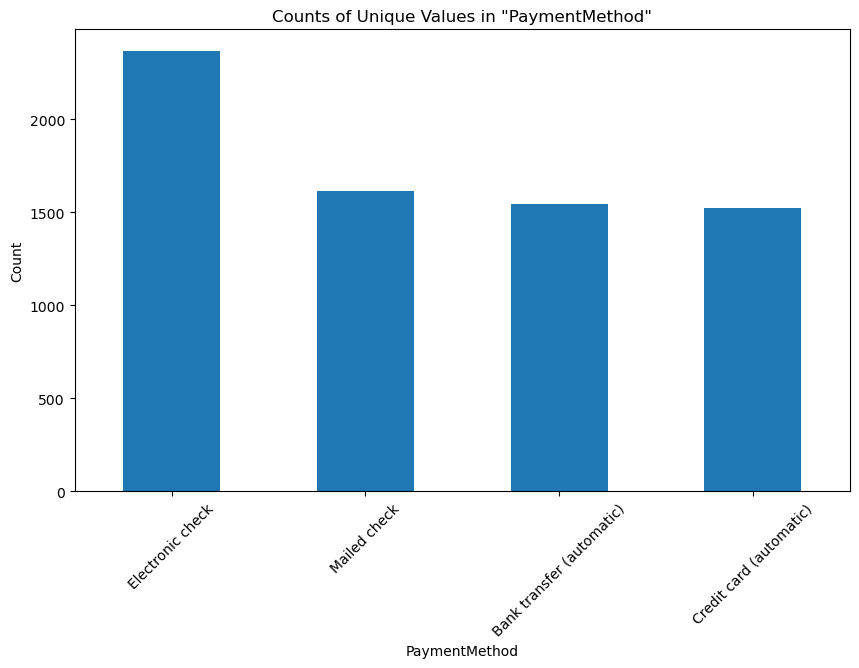

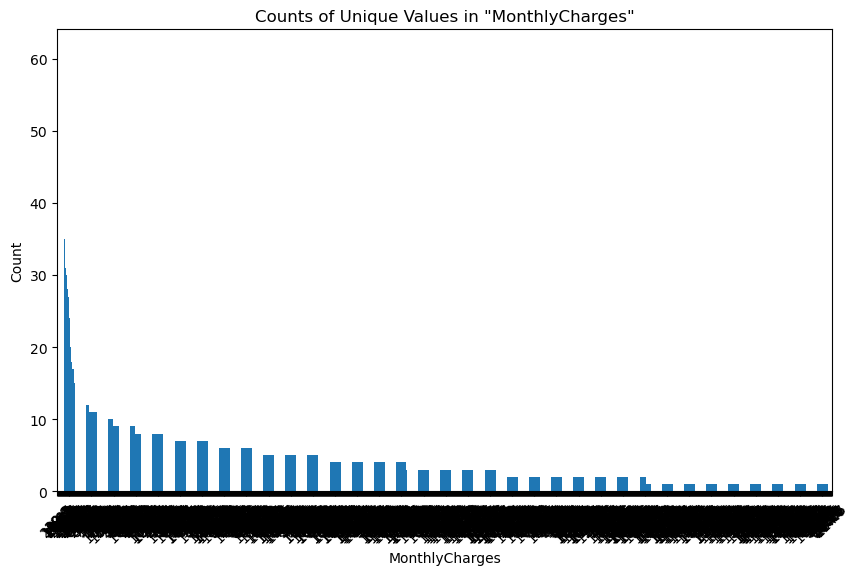

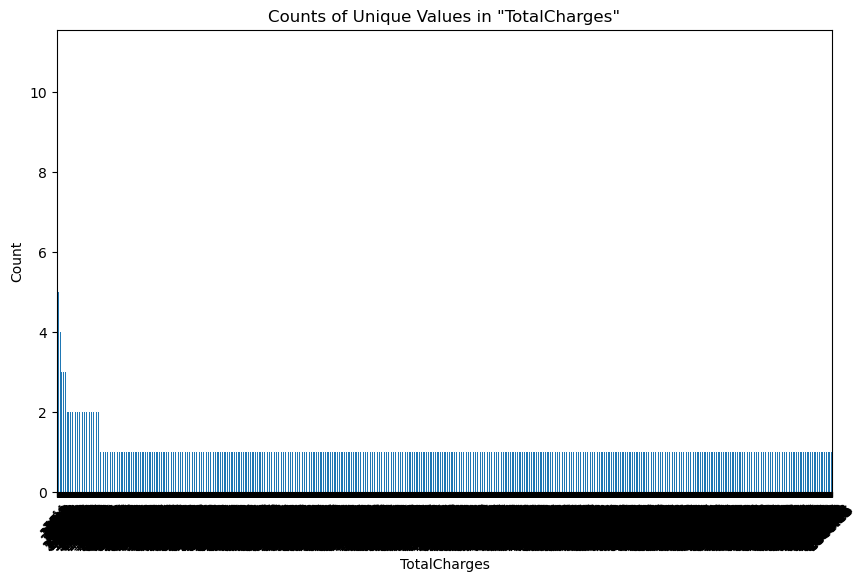

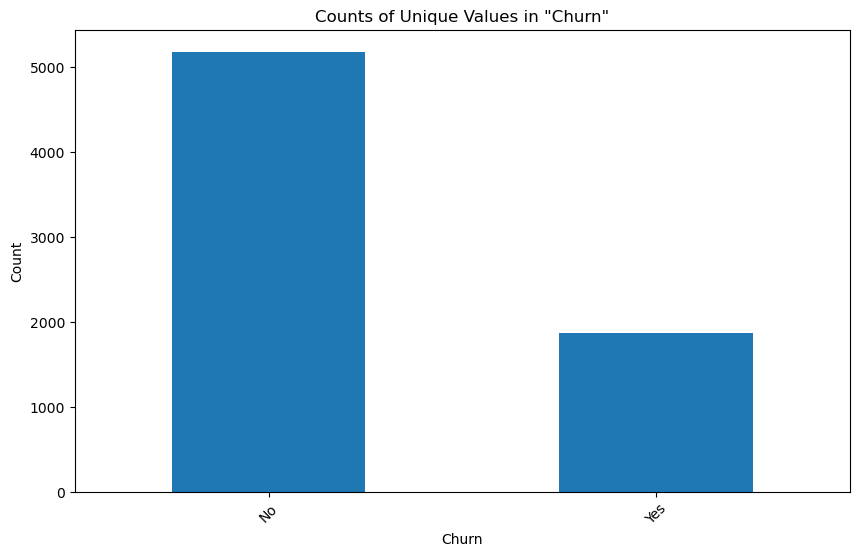

In [6]:
import matplotlib.pyplot as plt

for column in df.columns:
    value_counts = df[column].value_counts()
    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar')
    plt.title(f'Counts of Unique Values in "{column}"')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


<H1 >Check Duplicates and drop them

In [7]:
duplicates_exist = df.duplicated().any()

# Count the number of duplicate rows
num_duplicates = df.duplicated().sum()

print("Are there any duplicates?", duplicates_exist)
print("Number of duplicate rows:", num_duplicates)

# Display duplicate rows if any exist
if duplicates_exist:
    print("Duplicate rows:")
    print(df[df.duplicated()])

Are there any duplicates? False
Number of duplicate rows: 0


<H1>Removing CustomerID as the model doesnt really require 

In [8]:
df = df.drop(columns=['customerID'])
print(df.head())

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No  

<H1> LabelEncoding

In [9]:
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
non_numeric_columns = df.select_dtypes(exclude=['number']).columns.tolist()

print("Numeric Columns:", numeric_columns)
print("Non-numeric Columns:", non_numeric_columns)

Numeric Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges']
Non-numeric Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


LabelEncoding for non-numeric columns

In [10]:
from sklearn.preprocessing import LabelEncoder

label_mappings = {}

for column in df.select_dtypes(exclude=['number']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_mappings[column] = dict(zip(le.classes_, le.transform(le.classes_)))

print(df.head())
print("Label mappings for each column:", label_mappings)


   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 

<H1>Skewness

Initial Skewness

In [11]:
skewness = df.select_dtypes(include=['number']).skew()

print("Skewness of numeric columns:")
print(skewness)


Skewness of numeric columns:
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64


In [12]:
positive_skew_columns = skewness[skewness > 0].index.tolist()
negative_skew_columns = skewness[skewness < 0].index.tolist()

print("Columns with positive skewness:", positive_skew_columns)
print("Columns with negative skewness:", negative_skew_columns)


Columns with positive skewness: ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'TotalCharges', 'Churn']
Columns with negative skewness: ['gender', 'PhoneService', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']


Scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler

scalers = {}

for col in df.select_dtypes(include=['number']).columns:
    scaler = MinMaxScaler()
    df[[col]] = scaler.fit_transform(df[[col]])
    scalers[col] = scaler

print(df.head())


   gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0     0.0            0.0      1.0         0.0  0.013889           0.0   
1     1.0            0.0      0.0         0.0  0.472222           1.0   
2     1.0            0.0      0.0         0.0  0.027778           1.0   
3     1.0            0.0      0.0         0.0  0.625000           0.0   
4     0.0            0.0      0.0         0.0  0.027778           1.0   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0            0.5              0.0             0.0           1.0   
1            0.0              0.0             1.0           0.0   
2            0.0              0.0             1.0           1.0   
3            0.5              0.0             1.0           0.0   
4            0.0              0.5             0.0           0.0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0               0.0          0.0          0.0              0.0       0.0   
1     

Transformation(Normalisation)

In [14]:
import numpy as np

for col in positive_skew_columns:
    df[col] = np.log1p(df[col])

for col in negative_skew_columns:
    df[col] = np.square(df[col])

print(df.head())


   gender  SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
0     0.0            0.0  0.693147         0.0  0.013793           0.0   
1     1.0            0.0  0.000000         0.0  0.386773           1.0   
2     1.0            0.0  0.000000         0.0  0.027399           1.0   
3     1.0            0.0  0.000000         0.0  0.485508           0.0   
4     0.0            0.0  0.000000         0.0  0.027399           1.0   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0       0.405465         0.000000        0.000000      0.693147   
1       0.000000         0.000000        0.693147      0.000000   
2       0.000000         0.000000        0.693147      0.693147   
3       0.405465         0.000000        0.693147      0.000000   
4       0.000000         0.405465        0.000000      0.000000   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0          0.000000     0.000000          0.0              0.0  0.000000   


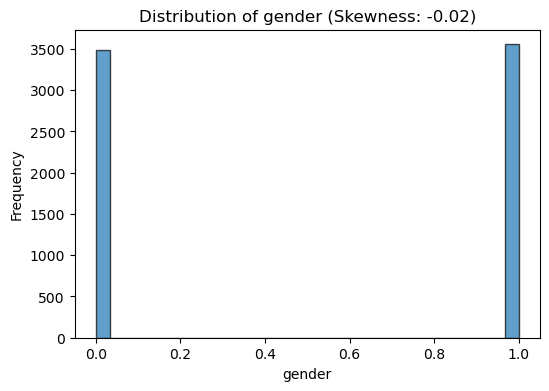

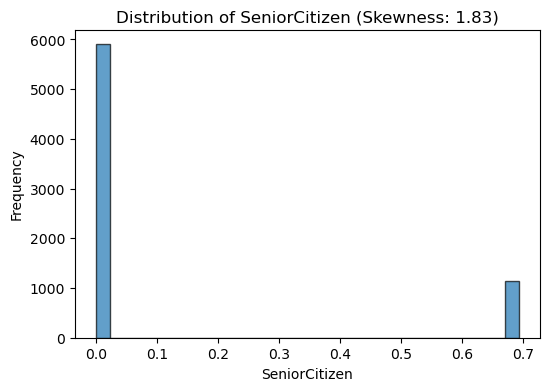

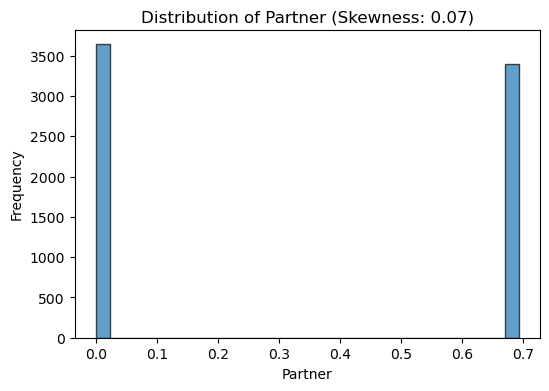

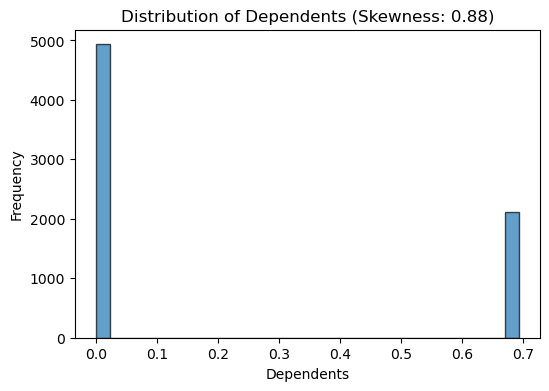

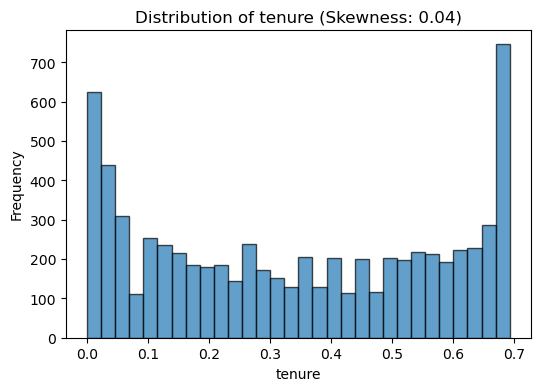

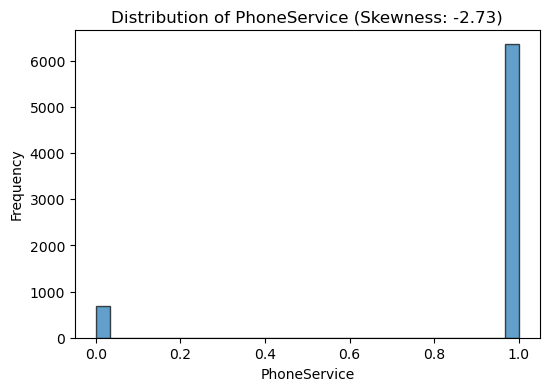

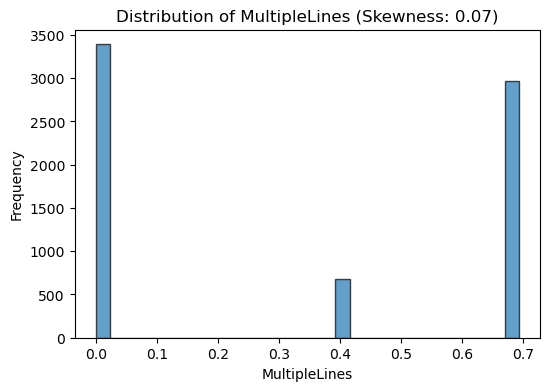

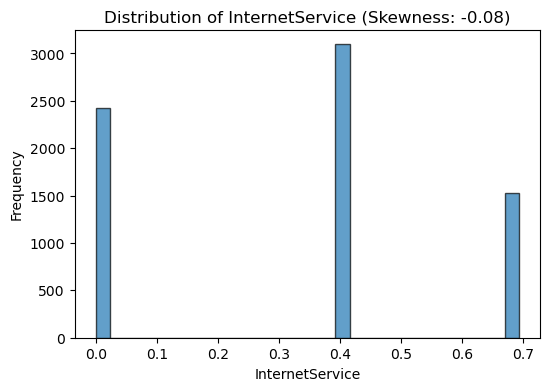

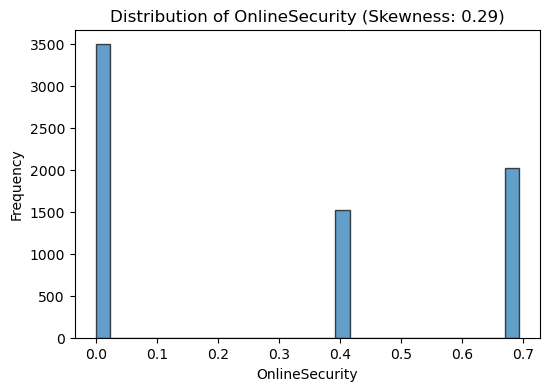

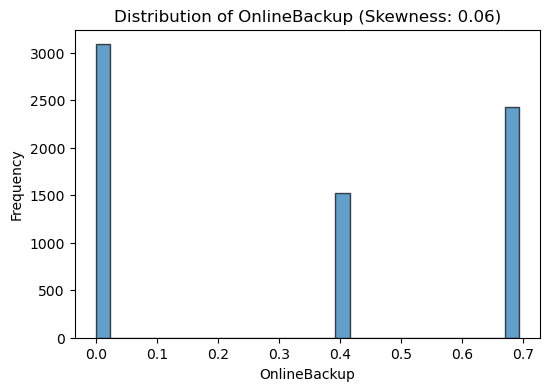

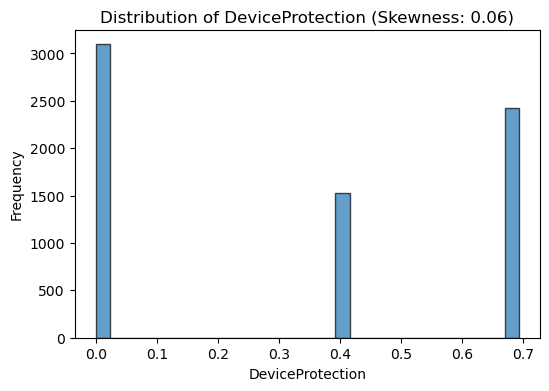

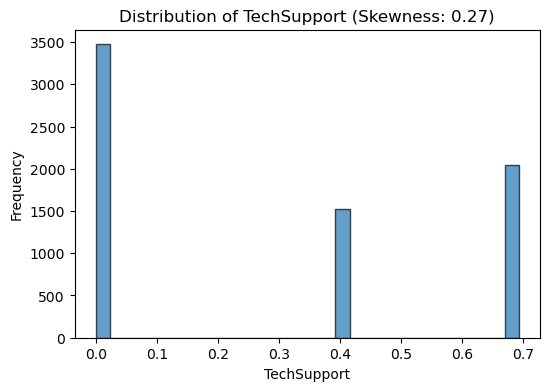

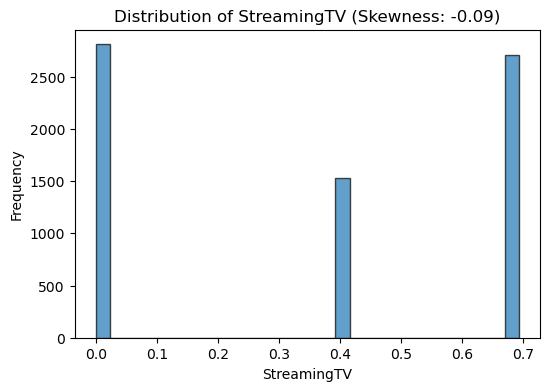

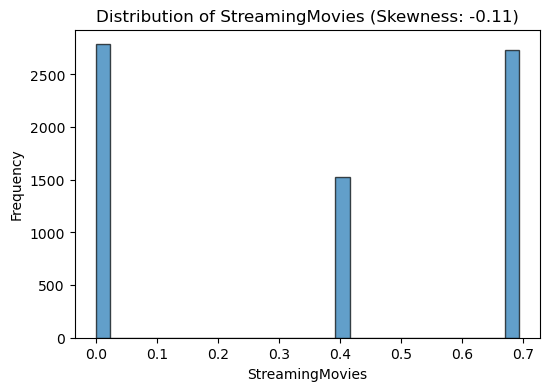

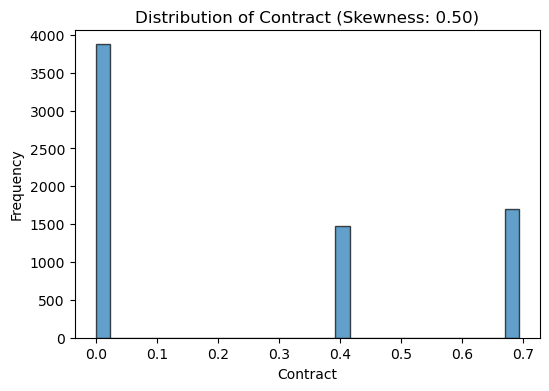

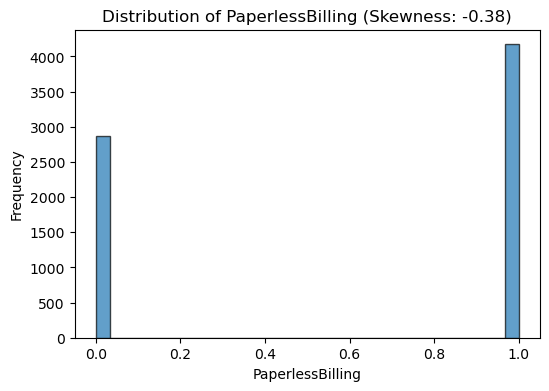

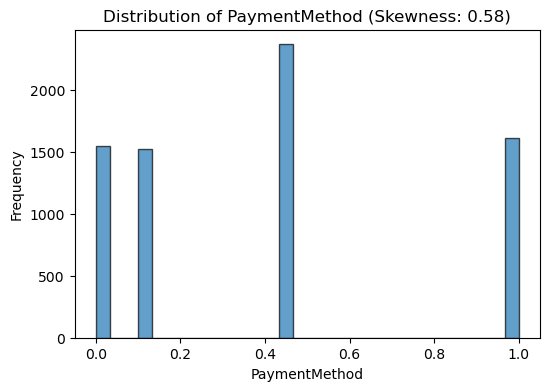

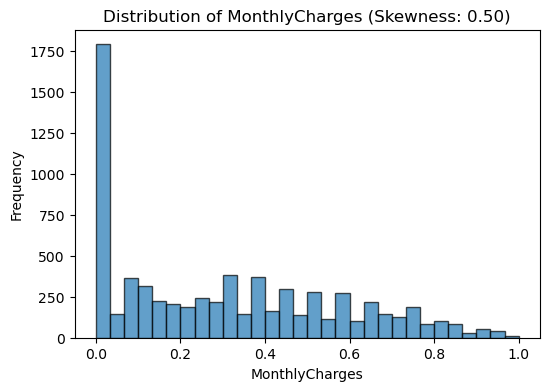

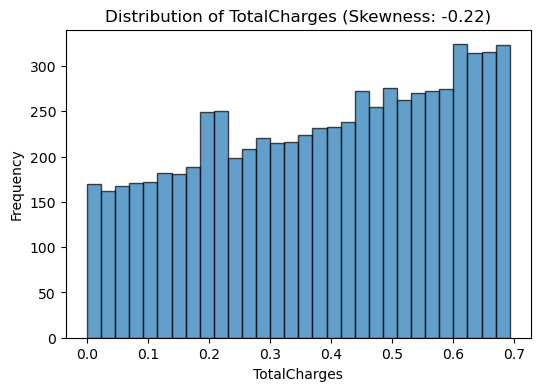

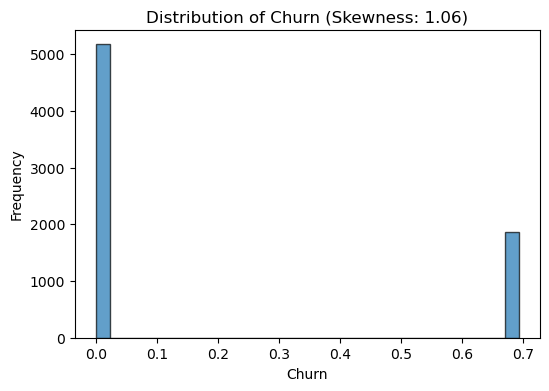

In [15]:
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include=['number']).columns

for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {col} (Skewness: {df[col].skew():.2f})')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [19]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.000000,0.693147,0.000000,0.013793,0.0,0.405465,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.444444,0.013322,0.324699,0.000000
1,1.0,0.000000,0.000000,0.000000,0.386773,1.0,0.000000,0.000000,0.693147,0.000000,0.693147,0.000000,0.000000,0.000000,0.405465,0.0,1.000000,0.148282,0.202534,0.000000
2,1.0,0.000000,0.000000,0.000000,0.027399,1.0,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.125478,0.023758,0.693147
3,1.0,0.000000,0.000000,0.000000,0.485508,0.0,0.405465,0.000000,0.693147,0.000000,0.693147,0.693147,0.000000,0.000000,0.405465,0.0,0.000000,0.057266,0.194246,0.000000
4,0.0,0.000000,0.000000,0.000000,0.027399,1.0,0.000000,0.405465,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.444444,0.272370,0.132478,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.000000,0.693147,0.693147,0.287682,1.0,0.693147,0.000000,0.693147,0.000000,0.693147,0.693147,0.693147,0.693147,0.405465,1.0,1.000000,0.438494,0.218785,0.000000
7039,0.0,0.000000,0.693147,0.693147,0.693147,1.0,0.693147,0.405465,0.000000,0.693147,0.693147,0.000000,0.693147,0.693147,0.405465,1.0,0.111111,0.714488,0.627321,0.000000
7040,0.0,0.000000,0.693147,0.693147,0.142174,0.0,0.405465,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.444444,0.012754,0.377408,0.000000
7041,1.0,0.693147,0.693147,0.000000,0.054067,1.0,0.693147,0.405465,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.312153,0.341709,0.693147
